# Methods and Results

In [1]:
# this is the methods and results for the final group project 
# I have cleaned and wrangled the data, I have also done a scatter plot visualization and plan to do a bar graph as well
# I am also trying to figure out the best k value but am running into some issues with the vfold function, I posted a question on piazza and am waiting to hear back from it 

## Data Cleaning and Wrangling

Before we can start summarizing the data and creating a model, we first have to load the necessary packages and read in the data and make sure it is tidy. The first step will be to load tidyverse, tidymodels and repr in so we can read our data set in, create visualizations and make our model. The next step will be to load in the players.csv dataset, which we will load from GitHub so everyone in our group will be able to see it even though they have a different working directory. 

In [2]:
library(tidyverse) 
library(repr)
library(tidymodels)
URL<- "https://raw.githubusercontent.com/navis17/DSCI-100-Group-Project-Final-Report/refs/heads/main/players.csv" #this is the raw data from GitHub
players<-read_csv(URL)
players

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


Now that we have loaded our data in, the next step is to make sure the data is tidy. This data looks pretty tidy, but we are going to want to convert the subscribe column into a factor type variable since we are using it as the class we want to predict. This can be done using as_factor. We also want to remove any observations that contain NAs 

In [3]:
players_clean<- players|>
mutate(subscribe = as_factor(subscribe))
players_clean

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


Our classifier will be predicting wether or not a player is subscribed to the game based newsletter based on player hours and age, so the next step would be to create a data table that only has the columns "subscribe", "played_hours" and "Age". This can be done using the select function. We also used the filter function to remove any observations in the played_hours column that were 0, as we thought that data collected on users who actually use the server may be better suited to answer the research question. We also removed any observations in the Age column that were NAs as we will not want to use those observations in our classifier. 

In [4]:
players_select<- players_clean |>
filter(!played_hours == 0, !Age == "NA") |> 
select(subscribe, played_hours, Age) 
players_select





subscribe,played_hours,Age
<fct>,<dbl>,<dbl>
TRUE,30.3,9
TRUE,3.8,17
TRUE,0.7,21
TRUE,0.1,21
TRUE,0.1,17
TRUE,1.6,23
TRUE,1.5,25
TRUE,0.2,22
TRUE,48.4,17


Before we create our classifier, it might be useful to visualize the data to see if we can find any trends that show a relationship between played hours and age, and how they might affect 4subscription status. Using a scatter plot and coloring by subscription status will be the best way to see a trend. 

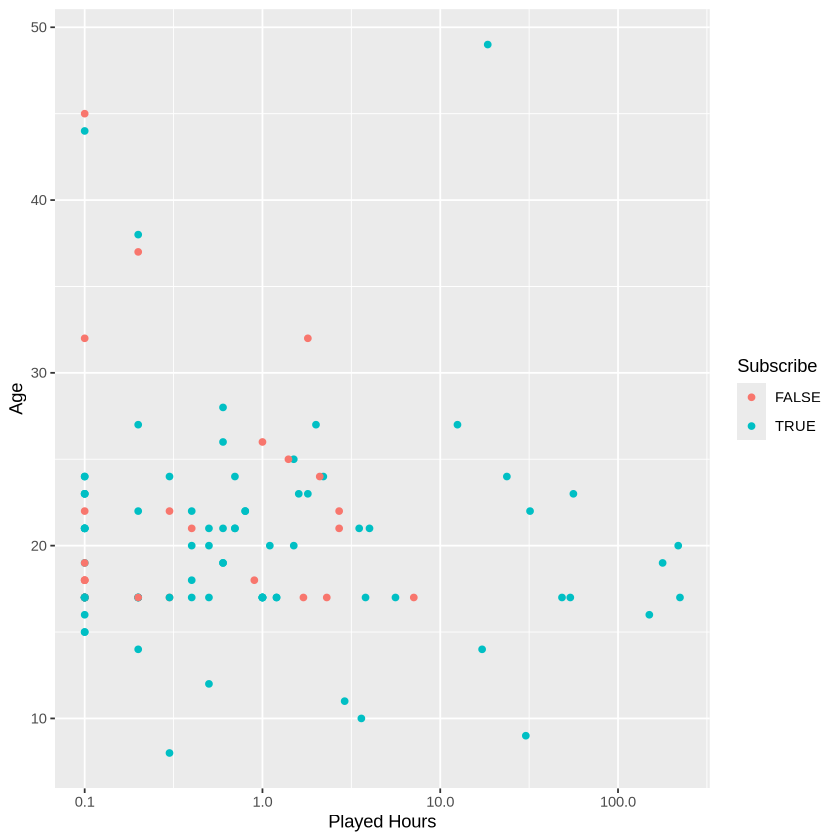

In [5]:
players_plot<- players_select |>
ggplot(aes(x = played_hours, y = Age, color = subscribe)) + scale_x_log10() +
geom_point() +
labs(x = "Played Hours", y = "Age", color = "Subscribe")
players_plot

From the data above, it looks like players who spend more time on the server are more likely to be subscribed to the game related newsletter, and players who are younger are also more likely to be subscribed. The played_hours variable was 10 log scaled, as there were some players who played 200+ hours and when this data was plotted without scaling there was a lot of data clumping because the x axis was too spread out. 

*It is important to note that there are a few data points that do not fit this trend, but outliers are expected in most data sets?*

Now that we have tidied our data, wrangled it and created some visualizations, we can start creating our classifier that will aim to predict wether a player is subscribed to a game related magazine based on their age and played hours. 

## Creating a Model

### Exploring data 

Now that we have processed our data, we can start to create a classifier model. The first thing we can do is explore our data a bit more. We wanted to see what percentage of players subscribed to the game related newsletter, and we can do this by using group_by and summarize. 

In [6]:
num_obs<- nrow(players_select)
players_percentage<- players_select |>
group_by(subscribe) |>
summarize(Count = n(), Percentage = n() / num_obs * 100)
players_percentage

subscribe,Count,Percentage
<fct>,<int>,<dbl>
FALSE,25,22.93578
TRUE,84,77.06422


Now we can see that majority of the players (77%) who played > 0 hours on the server are subscribed to the game related newsletter.

### Creating the Model 

Our first step is going to be setting a seed, because we are going to need to randomly select observations to create a test set and a training set. We will scaling and using the training data to create our classifier, and we will use the test data to test the accuracy, precision and recall of our model. Setting a seed will let us be able to reproduce the random selection that R performed when splitting the data. Once we set the seed, we can split our data into training and testing sets. We are going to use 75% of our data in our training set, and the other 25% will be used for the test set. 

Next, we create a recipe for our model which we can add to our workflow later. We use vfold to perform cross validation on our data, so our model will be more accurate *maybe more info about cross validation here*

In order to create a good model, we want to choose the best k value possible. We can do this by putting tune() in the neighbors argument when we use the nearest neighbor function. We also add which engine we want to use, and what mode we want to use which is classification, as we are creating a classifier model.

In [14]:
set.seed(1) 
players_split<-initial_split(players_select, prop = 0.75, strata = subscribe) 
players_train<- training(players_split) 
players_test<- testing(players_split)


players_recipe<- recipe(subscribe~ Age, played_hours, data = players_train) |>
step_scale(all_predictors()) |>
step_center(all_predictors())


players_spec<- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
set_engine("kknn") |>
set_mode("classification")

players_fold<- vfold_cv(players_train, v = 5, strata = subscribe)

k_value<- tibble(neighbors = seq(from = 1, to = 10, by = 1))

best_k<- workflow() |>
add_recipe(players_recipe) |>
add_model(players_spec) |>
tune_grid(resamples = players_fold, grid = k_value) |>
collect_metrics()
best_k


players_k<- best_k |>
filter(.metric == "accuracy") |>
arrange(desc(mean)) |>
head(1) |>
pull(neighbors)
 



neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.4721569,5,0.04330804,Preprocessor1_Model01
1,roc_auc,binary,0.5583333,5,0.04128772,Preprocessor1_Model01
2,accuracy,binary,0.4721569,5,0.04330804,Preprocessor1_Model02
2,roc_auc,binary,0.6361111,5,0.01560926,Preprocessor1_Model02
3,accuracy,binary,0.6329412,5,0.04737800,Preprocessor1_Model03
3,roc_auc,binary,0.6514957,5,0.01166146,Preprocessor1_Model03
4,accuracy,binary,0.6329412,5,0.04737800,Preprocessor1_Model04
4,roc_auc,binary,0.5927350,5,0.05002168,Preprocessor1_Model04
5,accuracy,binary,0.5976471,5,0.04693775,Preprocessor1_Model05


 Now we can use cross validation to split our data into 5 chunks, and within each chunk 5 more splits will be made. 4/5 of the 5 chunks will be training data, the other chunk will be testing data. This will improve the accuracy of our classifier.